## Импорт библиотек и датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

## Сводная информация по датасэту

In [6]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [8]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [9]:
print(set(train['Ecology_2']), set(train['Ecology_3']), set(train['Shops_2']))

{'A', 'B'} {'A', 'B'} {'A', 'B'}



Заменим значения в фичах Ecology_2 Ecology_3 и Shops_2 на 0 и 1, а тип данных на int.
 

In [10]:
changeAB = {'A': 0, 'B': 1}

train['Ecology_2'] = train['Ecology_2'].replace(changeAB)
train['Ecology_3'] = train['Ecology_3'].replace(changeAB)
train['Shops_2'] = train['Shops_2'].replace(changeAB)

train['Ecology_2'] = train['Ecology_2'].astype(int)
train['Ecology_3'] = train['Ecology_3'].astype(int)
train['Shops_2'] = train['Shops_2'].astype(int)

## Исследование фичей

## Пропуски данных

In [11]:
train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Пропущенны данные только в столбцах LifeSquare и в Healthcare_1. Так как в Healthcare_1 нехватает почти 50% можем удалить эту фичу совсем.

In [12]:
train = train.drop('Healthcare_1', axis = 1)

C LifeSquare будем разбираться позже.

## Корреляция 

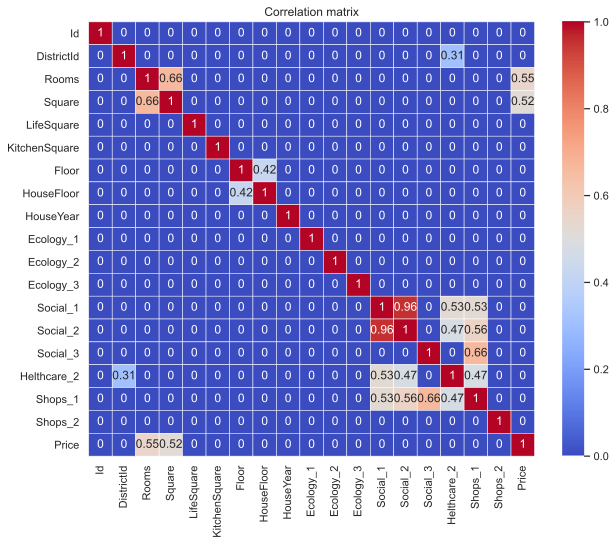

In [13]:
plt.figure(figsize = (10,8))

sns.set(font_scale=1)

corr_matrix = train.corr()
corr_matrix = np.round(corr_matrix, 3)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

* Видим что Rooms и Square коррелируют друг с другом, а так же имеют влияние на целевое показатель 'Price'. 
* Видим что Floor и HouseFloor коррелируют.
* Social_1 и Social_2 так же коррелируют, и влияют на Healtcare_2 и Shop_1.

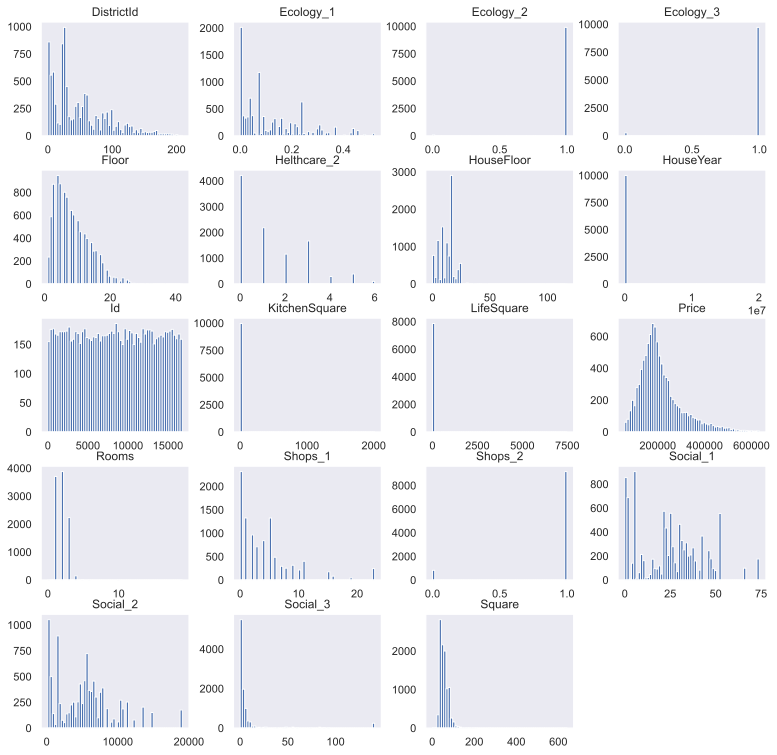

In [14]:
train.hist(figsize=(13,13), bins=60, grid=False);

Ниже будем исследовать:
* Rooms - так как tcnm подозрительно большие значения
* Floor и HouseFloor, так как у них есть корреляции и нулевые значения.
* HouseYear - так как есть заметные выбросы
* Square, KitchenSquare и LifeSquare - так как там тоже скорее всего есть выбросы и пропуски


## Rooms

Сначала проверим Rooms на выбросы 

In [15]:
train['Rooms'].unique()

array([ 3.,  1.,  2.,  4.,  5., 10.,  0., 19.,  6.])

In [16]:
train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Все значения больше 4.0 явно можем считать выбросами. А так же значение 0.0 скорее всего ошибка. 
Значения больше 4-х округлим до 4. Нулевые значения заполним исходя из среднего значения Square/Rooms

In [17]:
train.loc[train['Rooms'] >= 4, 'Rooms'] = 4

train['Rooms'].value_counts()

2.0    3880
1.0    3705
3.0    2235
4.0     172
0.0       8
Name: Rooms, dtype: int64

In [18]:
mean_Sq_Rm = np.mean(train['Square'][0:1390]/train['Rooms'][0:1390])

for i in train['Square']:
    train.loc[train['Rooms'] == 0, 'Rooms'] = i//mean_Sq_Rm

In [19]:
train['Rooms'].value_counts()

2.0    3880
1.0    3705
3.0    2243
4.0     172
Name: Rooms, dtype: int64

## Floor и HouseFloor

Найдем выброса в HouseFloor и Floor

In [20]:
train['HouseFloor'].unique()

array([ 10.,   8.,  17.,  22.,  16.,   9.,  12.,  20.,  14.,  24.,   5.,
         0.,   1.,   3.,   4.,   6.,   7.,  25.,  21.,  11.,   2.,  23.,
        19.,  15.,  18.,  32.,  45.,  30.,  99.,  40.,  44.,  13.,  39.,
        28.,  27.,  37., 117.,  31.,  48.,  47.,  29.,  36.,  38.,  26.])

In [21]:
train['HouseFloor'].unique()

array([ 10.,   8.,  17.,  22.,  16.,   9.,  12.,  20.,  14.,  24.,   5.,
         0.,   1.,   3.,   4.,   6.,   7.,  25.,  21.,  11.,   2.,  23.,
        19.,  15.,  18.,  32.,  45.,  30.,  99.,  40.,  44.,  13.,  39.,
        28.,  27.,  37., 117.,  31.,  48.,  47.,  29.,  36.,  38.,  26.])

Избавимся от нулевых значений, заменим их на медианные.

In [22]:
train.loc[train['HouseFloor'] == 0, 'HouseFloor'] = train['HouseFloor'].median()

In [23]:
train['HouseFloor'].unique()

array([ 10.,   8.,  17.,  22.,  16.,   9.,  12.,  20.,  14.,  24.,   5.,
        13.,   1.,   3.,   4.,   6.,   7.,  25.,  21.,  11.,   2.,  23.,
        19.,  15.,  18.,  32.,  45.,  30.,  99.,  40.,  44.,  39.,  28.,
        27.,  37., 117.,  31.,  48.,  47.,  29.,  36.,  38.,  26.])

Найдем ошибочные значения, когда этаж квартиры больше чем этажность дома

In [24]:
floor_outliers = train.loc[train['Floor'] > train['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

Таких нашлось 1825 строк. Заменим их на рандомные в диапазаоне от 1 до максимального значения этажа

In [25]:
train.loc[floor_outliers, 'Floor'] = train.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [26]:
(train['Floor'] > train['HouseFloor']).sum()

0

## HouseYear

In [27]:
train['HouseYear'].unique()

array([    2014,     1966,     1988,     1977,     1972,     1968,
           1986,     2008,     1978,     2012,     1969,     2003,
           1981,     1962,     2015,     2018,     1976,     1985,
           1960,     2019,     1974,     1956,     1963,     1961,
           1979,     2006,     1953,     1973,     1982,     1965,
           2007,     2013,     1983,     1995,     1971,     2017,
           1964,     1991,     1990,     2016,     2011,     1984,
           1993,     1997,     2009,     1975,     2010,     1987,
           1935,     1970,     1967,     1989,     1959,     1996,
           2005,     1994,     1958,     2004,     1998,     1992,
           1980,     2000,     2002,     1954,     2001,     1999,
           1917,     1955,     1957,     1934,     2020,     1932,
           1942,     1940,     1937,     1941,     1939,     1931,
           1951,     1912,     1918,     1952,     1919,     1936,
           1930,     1938,     1950,     1933,     1929,     1

Сходу видно как минимум одно некорректное значение 20052011. Скорее всего это было 2005 - 2011. Найдем еще нерелеватные значения.

In [28]:
train.loc[train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,1,1,25,4756,16,5,8,1,243028.603096
9163,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,1,1,30,6141,10,3,6,1,254084.534396


Занчение 20052011 заменим на среднее значение - 2008. Значение 4968 заменим на максимальное значение - 2020

In [29]:
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = 2008
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 2020

In [30]:
train.loc[train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price




## KitchenSquare и LifeSquare

In [31]:
train['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [32]:
train['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [33]:
train.loc[train['LifeSquare'] > 500]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
8000,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,1,1,2,469,0,0,0,1,217357.492366
9229,11602,30,2.0,641.065193,638.163193,10.0,13,19.0,2019,0.000078,1,1,22,6398,141,3,23,1,133529.681562


Значение 7480 явно ошибочное, так как общая площадь всего 81.6. Скорее всего имелось в виду 74.8. Заменим это значение 74.8, это поможет нам избавится от очень заметного выброса и проанализировать остальное распределение значений.

In [34]:
train.loc[train['LifeSquare'] > 1000, 'LifeSquare'] = 74.8

Обрабаотаем пропуски в LifeSquare. Вычтем из общей площади площадь кухни

In [35]:
condition = (train['LifeSquare'].isna()) \
             & (~train['Square'].isna()) \
             & (~train['KitchenSquare'].isna())
        
train.loc[condition, 'LifeSquare'] = train.loc[condition, 'Square'] - train.loc[condition, 'KitchenSquare'] - 3

In [36]:
train.loc[train['LifeSquare'] <= 5, 'LifeSquare'] = train.loc[train['LifeSquare'] <= 5, 'Square'] - train.loc[train['LifeSquare'] <= 5, 'KitchenSquare']
train.loc[train['LifeSquare'] <= 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
682,16593,52,2.0,64.859242,2.859242,62.0,15,17.0,1977,0.371149,1,1,34,7065,1,2,5,1,185993.474671
4496,15744,34,1.0,1.988943,0.988943,1.0,4,4.0,1977,0.069753,1,1,53,13670,4,1,11,1,458378.777006
4800,7657,38,1.0,4.502784,3.502784,1.0,1,1.0,1977,0.060753,1,1,15,2787,2,0,7,1,483283.488083
5009,11526,27,1.0,4.633498,3.633498,1.0,1,1.0,1977,0.011654,1,1,4,915,0,0,0,1,107604.269441
6079,448,48,1.0,41.186904,0.186904,41.0,1,1.0,1977,0.041125,1,1,46,9515,5,1,10,1,216882.265408
7470,14786,1,1.0,1.136859,0.136859,1.0,1,1.0,1977,0.007122,1,1,1,264,0,0,1,1,181434.825589
7601,12666,34,2.0,60.603363,2.603363,58.0,14,22.0,1977,0.069753,1,1,53,13670,4,1,11,1,261733.472106
8572,10202,6,1.0,2.596351,1.596351,1.0,3,25.0,2014,0.243205,1,1,5,1564,0,0,0,1,137597.601458
9869,3224,27,3.0,2.377248,2.377248,0.0,1,13.0,1977,0.017647,1,1,2,469,0,0,0,1,126596.941798


In [37]:
train.loc[train['KitchenSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6505,14679,81,1.0,32.276663,19.278394,1970.0,1,1.0,1977,0.006076,1,1,30,5285,0,6,6,1,105539.556275
9520,14656,62,1.0,47.100719,46.447960,2014.0,1,1.0,2014,0.072158,1,1,2,629,1,0,0,0,108337.484207


In [38]:
train.loc[train['KitchenSquare'] > 200, 'KitchenSquare'] = 6

In [39]:
train.loc[train['LifeSquare'] > train['Square'], 'LifeSquare'] = train.loc[train['LifeSquare'] > train['Square'], 'Square'] - train.loc[train['LifeSquare'] > train['Square'], 'KitchenSquare'] - 3

In [40]:
(train['LifeSquare'] > train['Square']).sum()

0

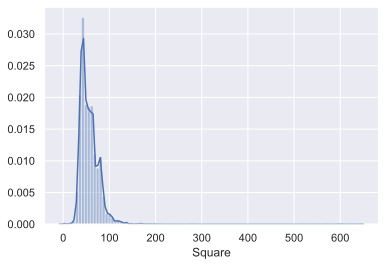

In [41]:
sns.distplot(train['Square'], bins=100)

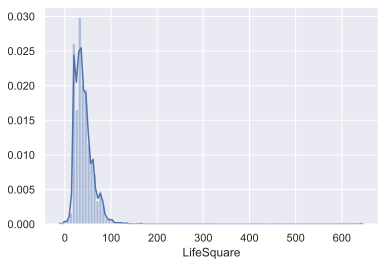

In [42]:
sns.distplot(train['LifeSquare'], bins=100)

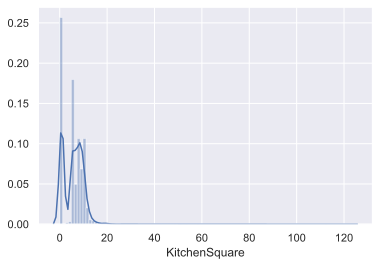

In [43]:
sns.distplot(train['KitchenSquare'], bins=100)

### Еще раз проверяем train на пропуски и типы данных

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  int64  
 18  Price  

### Разделяем train на тренировочный и валидационный сэты.

In [45]:
train_df = train.drop('Price', axis = 1)
train_df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1
3,2352,1,1.0,40.409907,36.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1


In [46]:
y = pd.DataFrame(train['Price'], columns = ['Price'])
y.head(5)

,Price
0,305018.871089
1,177734.553407
2,282078.720850
3,168106.007630
4,343995.102962


In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df, y, test_size = 0.3)

## Случайный лес

In [48]:
rf = RandomForestRegressor()

In [49]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
y_pred = rf.predict(X_valid)

In [51]:
check_test = pd.DataFrame({'y_valid': y_valid['Price'], 'y_pred': y_pred.flatten()})
check_test['Error'] = check_test['y_valid'] - check_test['y_pred']
check_test.head(3)

,y_valid,y_pred,Error
5894,217009.338463,184326.060759,32683.277703
4995,103919.964105,145075.105157,-41155.141051
3533,161842.794818,186993.221666,-25150.426848


R2:	0.738
RMSE:	48155.585
MSE:	2318960368.055


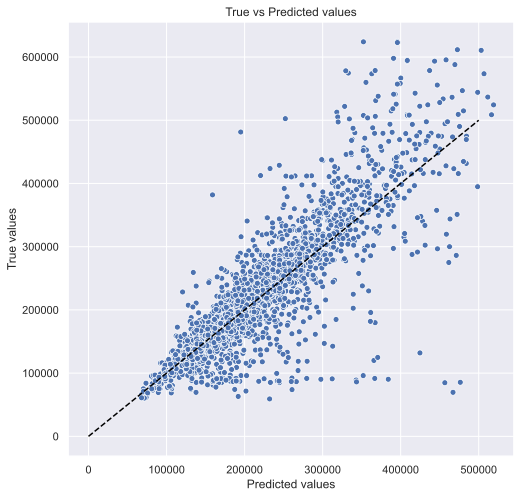

In [52]:
evaluate_preds(check_test['y_valid'], check_test['y_pred'])

r2 > 0.7 нам подходит. Теперь доработаем test датасэт по аналогии с train и запустим наш предикт по нему.

## GradientBossting

In [100]:
gb = GradientBoostingRegressor(criterion='mse',
                                max_depth=5,
                                min_samples_leaf=10,
                                random_state=88,  
                                n_estimators=100)

In [101]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                          random_state=88)

In [102]:
y_pred = gb.predict(X_valid)

In [103]:
check_test = pd.DataFrame({'y_valid': y_valid['Price'], 'y_pred': y_pred.flatten()})
check_test['Error'] = check_test['y_valid'] - check_test['y_pred']
check_test.head(3)

,y_valid,y_pred,Error
5894,217009.338463,197962.724380,19046.614082
4995,103919.964105,139614.431257,-35694.467152
3533,161842.794818,176935.153105,-15092.358287


R2:	0.753
RMSE:	46787.437
MSE:	2189064240.224


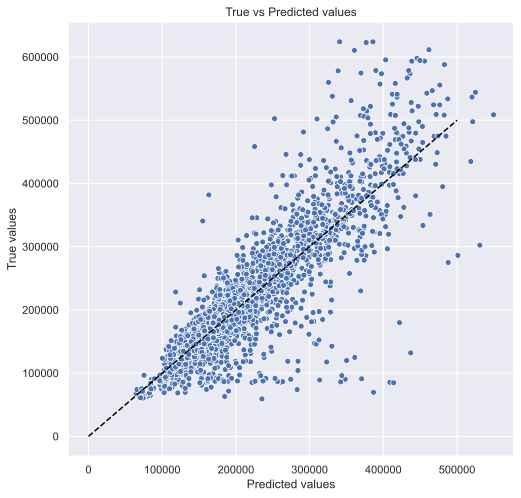

In [104]:
evaluate_preds(check_test['y_valid'], check_test['y_pred'])

Градиентный бустинг дает чуть лучший итоговый результат. Остановимся на этой модели.

## Подготовка test датасэта. Повторяем все изменения из train сэта

In [105]:
test.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B


In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Удаляем Healthcare_1 и переименуем Helthcare_2 в Healthcare_2

In [107]:
test = test.drop('Healthcare_1', axis = 1)

In [108]:
test.rename(columns={'Helthcare_2': 'Healthcare_2'}, inplace=True)
test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,0,11,B


In [109]:
test['Ecology_2'] = test['Ecology_2'].replace(changeAB)
test['Ecology_3'] = test['Ecology_3'].replace(changeAB)
test['Shops_2'] = test['Shops_2'].replace(changeAB)

test['Ecology_2'] = test['Ecology_2'].astype(int)
test['Ecology_3'] = test['Ecology_3'].astype(int)
test['Shops_2'] = test['Shops_2'].astype(int)

In [110]:
test.loc[test['Rooms'] >= 4, 'Rooms'] = 4

In [111]:
for i in test['Square']:
    test.loc[test['Rooms'] == 0, 'Rooms'] = i//mean_Sq_Rm

In [112]:
test['Rooms'].value_counts()

2.0    2030
1.0    1771
3.0    1099
4.0     100
Name: Rooms, dtype: int64

In [113]:
test.loc[test['HouseFloor'] == 0, 'HouseFloor'] = train['HouseFloor'].median()

In [114]:
test_floor_outliers = test.loc[test['Floor'] > test['HouseFloor']].index
test_floor_outliers

Int64Index([  11,   12,   14,   21,   22,   25,   26,   42,   46,   47,
            ...
            4951, 4952, 4960, 4971, 4973, 4976, 4978, 4980, 4982, 4995],
           dtype='int64', length=782)

In [115]:
test.loc[test_floor_outliers, 'Floor'] = test.loc[test_floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [116]:
(test['Floor'] > test['HouseFloor']).sum()

0

In [117]:
test['HouseYear'].unique()

array([1970, 2017, 1977, 1965, 2011, 2014, 1974, 1981, 2009, 2004, 2007,
       1990, 2015, 1979, 1972, 2020, 1964, 1997, 1980, 2016, 1988, 1968,
       1994, 2013, 1967, 1960, 2018, 1949, 2000, 2002, 1982, 1963, 1959,
       1989, 1962, 1985, 1966, 1958, 1999, 2008, 2005, 2001, 1995, 1978,
       1992, 1986, 2006, 2003, 1961, 1969, 2010, 1971, 1996, 1987, 1975,
       2019, 1973, 1998, 1957, 1993, 1976, 1956, 2012, 1983, 1984, 1932,
       1941, 1928, 1935, 1931, 1926, 1991, 1914, 1952, 1930, 1953, 1917,
       1938, 1933, 1948, 1929, 1943, 1927, 1955, 1934, 1908, 1954, 1918,
       1950, 1920, 1910, 1909, 1911, 1937, 1939, 1940, 1912])

In [118]:
test.loc[test['LifeSquare'] > 1000, 'LifeSquare'] = 74.8

In [119]:
condition2 = (test['LifeSquare'].isna()) \
             & (~test['Square'].isna()) \
             & (~test['KitchenSquare'].isna())
        
test.loc[condition2, 'LifeSquare'] = test.loc[condition2, 'Square'] - test.loc[condition2, 'KitchenSquare'] - 3

In [120]:
test.loc[test['LifeSquare'] <= 5, 'LifeSquare'] = test.loc[test['LifeSquare'] <= 5, 'Square'] - test.loc[test['LifeSquare'] <= 5, 'KitchenSquare']

In [121]:
test.loc[test['LifeSquare'] <= 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_2,Shops_1,Shops_2
131,16401,30,1.0,2.645046,1.645046,1.0,1,1.0,1977,0.000078,1,1,22,6398,141,3,23,1
972,5428,27,2.0,62.326044,1.326044,61.0,12,17.0,1977,0.072158,1,1,2,629,1,0,0,0
996,2138,27,1.0,5.647458,4.647458,1.0,1,1.0,1977,0.017647,1,1,2,469,0,0,0,1
1672,1420,45,1.0,1.975769,0.975769,1.0,1,1.0,1977,0.195781,1,1,23,5212,6,3,2,1
2051,10120,6,1.0,5.100672,4.100672,1.0,1,1.0,1977,0.243205,1,1,5,1564,0,0,0,1
2463,9011,53,1.0,1.378543,0.378543,1.0,1,1.0,1977,0.049637,1,1,34,7759,0,1,3,1
3608,1165,27,1.0,2.372101,1.372101,1.0,2,17.0,1977,0.011654,1,1,4,915,0,0,0,1
4193,7855,6,1.0,4.967143,3.967143,1.0,1,1.0,2018,0.243205,1,1,5,1564,0,0,0,1


In [122]:
test.loc[test['KitchenSquare'] > 200, 'KitchenSquare'] = 6

In [123]:
test.loc[test['LifeSquare'] > test['Square'], 'LifeSquare'] = test.loc[test['LifeSquare'] > test['Square'], 'Square'] - test.loc[test['LifeSquare'] > test['Square'], 'KitchenSquare'] - 3

In [124]:
(test['LifeSquare'] > test['Square']).sum()

0

In [125]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_2   5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   int64  
dtypes: float

## Делаем предсказание на test сэте.

In [126]:
y_pred_test = gb.predict(test)

In [127]:
y_pred_test

array([162626.11240669, 129438.83456253, 159763.4187029 , ...,
       149659.71333634, 187501.02467349, 263017.16480981])

In [128]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [129]:
submit['Price'] = y_pred_test
submit.head()

,Id,Price
0,4567,162626.112407
1,5925,129438.834563
2,960,159763.418703
3,3848,125965.615646
4,746,184938.185428


In [130]:
submit.to_csv('rf_khabibulin_submit_gb.csv', index=False)